<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/Class(10_4)_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [51]:
x_train =x_train.reshape(60000,28,28,1)
x_train = x_train.astype('float')/255.0
x_test =x_test.reshape(10000,28,28,1)
x_test = x_test.astype('float')/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [52]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)

(60000, 10)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./imageai-2.0.2-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/imageai-2.0.2-py3-none-any.whl'



In [53]:
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Normalization, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU



In [54]:
############## 
batch_size=64
epochs =20
classes =10

In [55]:
# from keras import metrics
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

In [56]:
################## tao ANN 1 lop an voi 128 te bao  ########
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax'))



In [57]:
# from keras.backend import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                 

In [58]:
train = model.fit(x_train, y_train, batch_size, epochs=epochs, verbose=1)

Epoch 1/20
938/938 [==============================] - 14s 5ms/step - loss: 0.4294 - accuracy: 0.8431
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2698 - accuracy: 0.9010
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2235 - accuracy: 0.9171
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.1967 - accuracy: 0.9276
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1725 - accuracy: 0.9359
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1501 - accuracy: 0.9437
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1293 - accuracy: 0.9509
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1123 - accuracy: 0.9578
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0944 - accuracy: 0.9645
Epoch 10/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0827 - accuracy: 0.968

In [60]:
model.save('/content/drive/MyDrive/MyPicture/CNN/model.h5')

<ipython-input-68-956572590ae4>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


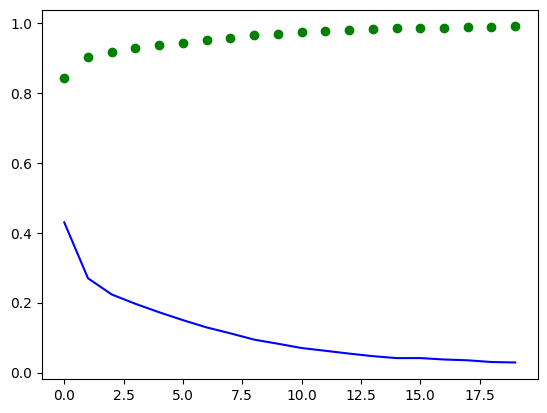

In [68]:
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()